In [1]:
import pandas as pd
import numpy as np 
import re

# NLTK
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn

# spacy for lemmatization
import spacy
import scipy.sparse
from spacy.lang.en import English
nlp = spacy.load("en_core_web_sm")

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to C:\Users\Gi
[nltk_data]     Han\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
ori_df = pd.read_csv('./Dataset/train_dataset_all.csv')
ori_df

,recipe_id,category,name,n_ingredients,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),...,log sugar,log sodium,log protein,log sat fat,log carbs,user_id,date,review,rating,description
0,5315,beverages,icy holiday punch,6,1440,54.5,0.0,50.0,0.0,0.0,...,3.912023,0.000000,0.000000,0.000000,1.386294,8629,2001-04-24,I brought this to an office holiday party and ...,4,.
1,8661,salads,oliveau salad dressing,8,20,168.7,28.0,3.0,3.0,0.0,...,1.098612,1.098612,0.000000,2.484907,0.000000,13483,2001-08-05,Good recipe and easy to make. I found it a li...,4,traditional french dressing -- this recipe was...
2,10859,vegetables,broccoli cauliflower and rice casserole,5,85,228.8,24.0,12.0,46.0,18.0,...,2.484907,3.828641,2.890372,3.465736,1.386294,8629,2001-08-15,This is a nice casserole. It is very easy to ...,2,easy and quick to prepare. grandmother's recip...
3,902,vegetables,microwaved garlic mushroom rolls,7,0,1188.6,88.0,53.0,69.0,75.0,...,3.970292,4.234107,4.317488,5.030438,3.828641,13483,2001-08-16,Very easy to make for a lunch. I served it co...,3,"i use brown flat mushrooms and slice them, i f..."
4,8549,meat,taverns,7,25,347.2,21.0,33.0,24.0,40.0,...,3.496508,3.178054,3.688879,3.218876,2.397895,13483,2001-09-04,A friend of mine loves ketchup so he loved thi...,5,a variation on a loose-meat sandwich. this was...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65179,392968,desserts,cinnamon brownie cupcakes,10,25,194.2,5.0,120.0,3.0,7.0,...,4.787492,1.098612,1.945910,2.197225,2.564949,599450,2010-04-09,These are absolutely to-die-for! Made as direc...,5,warm cinnamon enhances the chocolate flavor in...
65180,297946,vegetables,steamed vegetables with john s dipping sauce,10,27,152.9,15.0,18.0,11.0,5.0,...,2.890372,2.397895,1.609438,1.945910,1.609438,125388,2010-04-09,Very good way to add some extra taste to basic...,5,this combo of vegetables is what is most often...
65181,410482,desserts,the world s fastest chocolate sour cream cake ...,8,30,302.8,13.0,139.0,14.0,8.0,...,4.934474,2.639057,2.079442,3.135494,2.833213,573325,2010-04-09,This cake really is super easy and also super ...,5,"so so so good! so so so little work. well, y..."
65182,347632,pasta,kick butt spaghetti sauce out of a jar,10,20,113.7,10.0,26.0,12.0,3.0,...,3.258097,2.484907,1.098612,2.302585,1.098612,125388,2010-04-09,"Yes, I find that jarred spaghetti sauce needs ...",5,this is a conncoction i came up with tonight; ...


In [3]:
reviews_df = ori_df[['recipe_id', 'name', 'review']]
reviews_df.head()

,recipe_id,name,review
0,5315,icy holiday punch,I brought this to an office holiday party and ...
1,8661,oliveau salad dressing,Good recipe and easy to make. I found it a li...
2,10859,broccoli cauliflower and rice casserole,This is a nice casserole. It is very easy to ...
3,902,microwaved garlic mushroom rolls,Very easy to make for a lunch. I served it co...
4,8549,taverns,A friend of mine loves ketchup so he loved thi...


# Cleaning Data

In [4]:
# Remove non-English words
reviews_df['clean_review']  = reviews_df['review'].map(lambda x: re.sub("[^A-Za-z0-9]+"," ", x))

In [5]:
# Change all to lower
reviews_df['clean_review'] = reviews_df['clean_review'].apply(lambda x: x.lower())

In [6]:
# Tokenization
reviews_df['clean_review'] = [word_tokenize(row) for row in reviews_df['clean_review']]
reviews_df.head()

,recipe_id,name,review,clean_review
0,5315,icy holiday punch,I brought this to an office holiday party and ...,"[i, brought, this, to, an, office, holiday, pa..."
1,8661,oliveau salad dressing,Good recipe and easy to make. I found it a li...,"[good, recipe, and, easy, to, make, i, found, ..."
2,10859,broccoli cauliflower and rice casserole,This is a nice casserole. It is very easy to ...,"[this, is, a, nice, casserole, it, is, very, e..."
3,902,microwaved garlic mushroom rolls,Very easy to make for a lunch. I served it co...,"[very, easy, to, make, for, a, lunch, i, serve..."
4,8549,taverns,A friend of mine loves ketchup so he loved thi...,"[a, friend, of, mine, loves, ketchup, so, he, ..."


In [7]:
# Remove stop words

stop_words = stopwords.words('english')

def remove_stopwords(text):
    return [w for w in text if w not in stop_words]

reviews_df['clean_review'] = reviews_df['clean_review'].apply(lambda x: remove_stopwords(x))

In [8]:
# lemmatization & noun extraction 

def lemmatization(text, allowed_postags=['NOUN']):
    doc = nlp(' '.join(text)) 
    text_out = [token.lemma_ for token in doc if token.pos_ in allowed_postags]
    return text_out

reviews_df['noun_review'] = reviews_df['clean_review'].apply(lambda x: lemmatization(x))

In [9]:
reviews_df['noun_review'].head()

0                            [office, holiday, party]
1       [recipe, make, bit, salad, wine, dilute, bit]
2                                    [casserole, put]
3    [lunch, sandwich, time, cheese, cheese, cheddar]
4            [friend, ketchup, ketchup, lot, flavour]
Name: noun_review, dtype: object

### Remove less helpful words

In [10]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed reviews together
long_string = ''
for word_list in reviews_df['noun_review'].values:
    long_string += ' '.join(row for row in word_list) + ' '

long_string[:100]

'office holiday party recipe make bit salad wine dilute bit casserole put lunch sandwich time cheese '

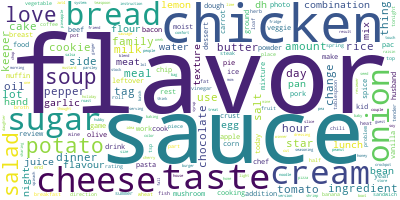

In [14]:
new_stop_words = stopwords.words('english')
new_stop_words += ['recipe', 'thank', 'time', 'bit', 'minute', 'dish', 'cup', 'way']

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, stopwords = new_stop_words,
                      contour_color='steelblue', collocations = False,  random_state=1)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [15]:
def remove_stopwords_r2(text):
    return [w for w in text if w not in new_stop_words]

reviews_df['noun_review'] = reviews_df['noun_review'].apply(lambda x: remove_stopwords_r2(x))

In [16]:
reviews_df.head()

,recipe_id,name,review,clean_review,noun_review
0,5315,icy holiday punch,I brought this to an office holiday party and ...,"[brought, office, holiday, party, everyone, en...","[office, holiday, party]"
1,8661,oliveau salad dressing,Good recipe and easy to make. I found it a li...,"[good, recipe, easy, make, found, little, bit,...","[make, salad, wine, dilute]"
2,10859,broccoli cauliflower and rice casserole,This is a nice casserole. It is very easy to ...,"[nice, casserole, easy, put, together]","[casserole, put]"
3,902,microwaved garlic mushroom rolls,Very easy to make for a lunch. I served it co...,"[easy, make, lunch, served, cold, sandwich, fo...","[lunch, sandwich, cheese, cheese, cheddar]"
4,8549,taverns,A friend of mine loves ketchup so he loved thi...,"[friend, mine, loves, ketchup, loved, except, ...","[friend, ketchup, ketchup, lot, flavour]"


In [17]:
# Convert to csv
reviews_df.to_csv('./Dataset/train_all_noun.csv', index=False)

# Extract food noun

In [18]:
food_synset = wn.synsets('food')

# Check synset
for syn in food_synset:
    print(syn, '\n')
    print(syn.hyponyms())

Synset('food.n.01') 

[Synset('beverage.n.01'), Synset('chyme.n.01'), Synset('comestible.n.01'), Synset('comfort_food.n.01'), Synset('commissariat.n.01'), Synset('culture_medium.n.01'), Synset('fare.n.04'), Synset('feed.n.01'), Synset('foodstuff.n.02'), Synset('micronutrient.n.01'), Synset('miraculous_food.n.01'), Synset('nutriment.n.01'), Synset('soul_food.n.01'), Synset('water.n.06'), Synset('yolk.n.02')]
Synset('food.n.02') 

[Synset('baked_goods.n.01'), Synset('breakfast_food.n.01'), Synset('butter.n.01'), Synset('cheese.n.01'), Synset('chocolate.n.02'), Synset('coconut.n.01'), Synset('convenience_food.n.01'), Synset('dika_bread.n.01'), Synset('fish.n.02'), Synset('fresh_food.n.01'), Synset('health_food.n.01'), Synset('junk_food.n.01'), Synset('leftovers.n.01'), Synset('loaf.n.02'), Synset('meat.n.01'), Synset('pasta.n.02'), Synset('produce.n.01'), Synset('seafood.n.01'), Synset('slop.n.04'), Synset('yogurt.n.01')]
Synset('food.n.03') 

[Synset('pabulum.n.02')]


In [19]:
def recursive_hypernym(food_word_list, food_synset,n,m,index):
    if n == 1:
        return 
    elif m == n:
        food_name = [food_name.name().split('.')[0] for food_name in food_synset[index].hyponyms()]
        for word in food_name:

            food_word_list.append(word)
            recursive_hypernym(food_word_list,wn.synsets(word),n-1,m,index)
    else:
        
        for syn in food_synset: 
            food_name = [food_name.name().split('.')[0] for food_name in syn.hyponyms()]
            for word in food_name:

                food_word_list.append(word)
                recursive_hypernym(food_word_list,wn.synsets(word),n-1,m,index)
                
    return food_word_list

# parameters
# food_word_list = empty list
# synset of word = wn.synset("word")
# n = how many iterations you want
# m = conditional iteration count to exempt the first iteration for the below index
# index = what index of the first synset that you want

In [20]:
food_word_list = []
food_synset = wn.synsets("food")
food_word_list = recursive_hypernym(food_word_list,food_synset,4,4,1)
print(food_word_list[:10])
# print(food_word_list)

['baked_goods', 'bread', 'anadama_bread', 'bap', 'barmbrack', 'breadstick', 'brown_bread', 'bun', 'caraway_seed_bread', 'challah']


In [21]:
reviews_df['noun_review'] = reviews_df['clean_review'].apply(lambda x: list(set([w for w in x if w in food_word_list])))

In [22]:
reviews_df

,recipe_id,name,review,clean_review,noun_review
0,5315,icy holiday punch,I brought this to an office holiday party and ...,"[brought, office, holiday, party, everyone, en...",[]
1,8661,oliveau salad dressing,Good recipe and easy to make. I found it a li...,"[good, recipe, easy, make, found, little, bit,...",[]
2,10859,broccoli cauliflower and rice casserole,This is a nice casserole. It is very easy to ...,"[nice, casserole, easy, put, together]",[]
3,902,microwaved garlic mushroom rolls,Very easy to make for a lunch. I served it co...,"[easy, make, lunch, served, cold, sandwich, fo...","[cheese, cheddar]"
4,8549,taverns,A friend of mine loves ketchup so he loved thi...,"[friend, mine, loves, ketchup, loved, except, ...",[]
...,...,...,...,...,...
65179,392968,cinnamon brownie cupcakes,These are absolutely to-die-for! Made as direc...,"[absolutely, die, made, directed, using, origi...",[blast]
65180,297946,steamed vegetables with john s dipping sauce,Very good way to add some extra taste to basic...,"[good, way, add, extra, taste, basic, steamed,...","[celery, dip]"
65181,410482,the world s fastest chocolate sour cream cake ...,This cake really is super easy and also super ...,"[cake, really, super, easy, also, super, tasty...","[cake, top, chocolate]"
65182,347632,kick butt spaghetti sauce out of a jar,"Yes, I find that jarred spaghetti sauce needs ...","[yes, find, jarred, spaghetti, sauce, needs, k...",[spaghetti]


In [23]:
# Convert to csv
reviews_df.to_csv('./Dataset/train_food_noun.csv', index=False)